## Data exploration and transformation

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

### Data Split

In [4]:
from sklearn.model_selection import KFold

def get_fold(data,fold_number):
    n_splits = fold_number
    kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)
    X_train_list = []
    X_val_list = []

    data['Fold']=-1

    for fold, (train_index, val_index) in enumerate(kf.split(data)):
        data.loc[val_index, 'Fold'] = fold

    for i in range(fold_number):
        X_train = data[data['Fold'] != i].drop(columns=['Fold'])
        X_val = data[data['Fold'] == i].drop(columns=['Fold', 'Survived'])
        X_train_list.append(X_train)
        X_val_list.append(X_val)
    return X_train_list, X_val_list


In [6]:
raw_trainset = pd.read_csv('../input/train.csv')
test_data = pd.read_csv('../input/test.csv')

In [7]:
print("Raw Data Overview:")
print(raw_trainset.info())

Raw Data Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [8]:
train_data,val_data=get_fold(raw_trainset,5)

In [78]:
print("Test Data Overview:")
print(test_data.info())

Test Data Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB
None


In [79]:
train_data['Title'] = train_data['Name'].apply(lambda x: x.split(',')[1].split('.')[0].strip())
test_data['Title'] = test_data['Name'].apply(lambda x: x.split(',')[1].split('.')[0].strip())

In [80]:
print(train_data['Title'].unique())
print(test_data['Title'].unique())

['Mr' 'Mrs' 'Miss' 'Master' 'Don' 'Rev' 'Dr' 'Mme' 'Ms' 'Major' 'Lady'
 'Sir' 'Mlle' 'Col' 'Capt' 'the Countess' 'Jonkheer']
['Mr' 'Mrs' 'Miss' 'Master' 'Ms' 'Col' 'Rev' 'Dr' 'Dona']


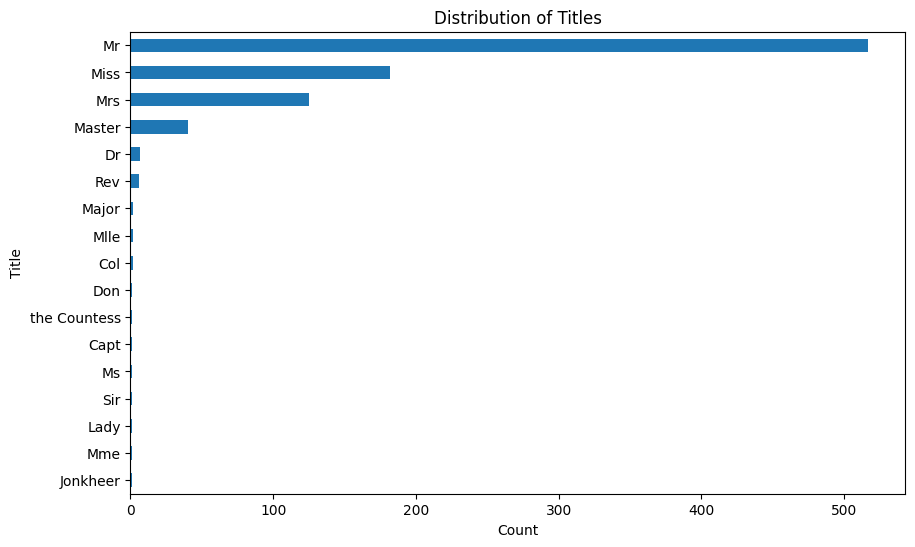

In [81]:
plt.figure(figsize=(10, 6))
train_data['Title'].value_counts().sort_values().plot(kind='barh')
plt.title('Distribution of Titles')
plt.xlabel('Count')
plt.ylabel('Title')
plt.show()

Title
Capt            0.000000
Col             0.500000
Don             0.000000
Dr              0.428571
Jonkheer        0.000000
Lady            1.000000
Major           0.500000
Master          0.575000
Miss            0.697802
Mlle            1.000000
Mme             1.000000
Mr              0.156673
Mrs             0.792000
Ms              1.000000
Rev             0.000000
Sir             1.000000
the Countess    1.000000
Name: Survived, dtype: float64


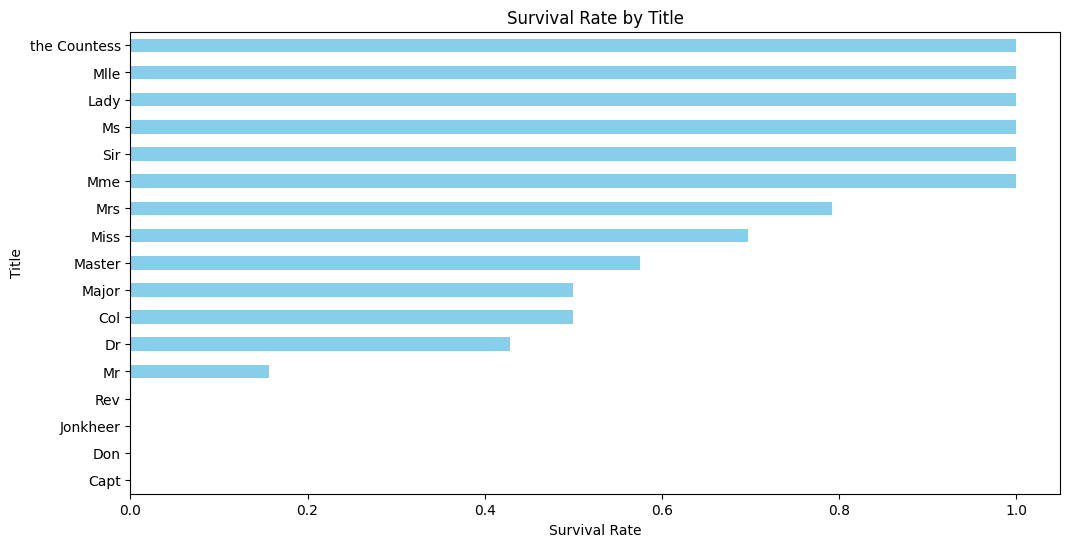

In [82]:
title_survival_rate = train_data.groupby('Title')['Survived'].mean()

print(title_survival_rate)

plt.figure(figsize=(12, 6))
title_survival_rate.sort_values().plot(kind='barh', color='skyblue')
plt.title('Survival Rate by Title')
plt.xlabel('Survival Rate')
plt.ylabel('Title')
plt.show()

In [83]:
def get_titles(title):
    if title in ['Mme', 'Ms', 'Lady', 'Dona']:
        return 'Mrs'
    elif title in ['Mlle', 'the Countess']:
        return 'Miss'
    elif title in ['Capt', 'Col', 'Major', 'Dr', 'Rev', 'Jonkheer', 'Don', 'Sir','Master']:
        return 'Rare'
    else:
        return title

In [84]:
train_data['Title'] = train_data['Title'].apply(get_titles)
test_data['Title'] = test_data['Title'].apply(get_titles)

In [85]:
train_data['Age'] = pd.to_numeric(train_data['Age'], errors='coerce')
test_data['Age'] = pd.to_numeric(test_data['Age'], errors='coerce')

In [86]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_distribution(col_x,key):
 sns.kdeplot(data=train_data[train_data[key] == 1], x=col_x, label='Survived', color='green', fill=True)
 sns.kdeplot(data=train_data[train_data[key] == 0], x=col_x, label='Not Survived', color='red', fill=True)

 plt.xlabel(col_x)
 plt.ylabel('Density')
 plt.title(f'Density Plot of {col_x} by {key}')
 plt.legend()

 plt.show()

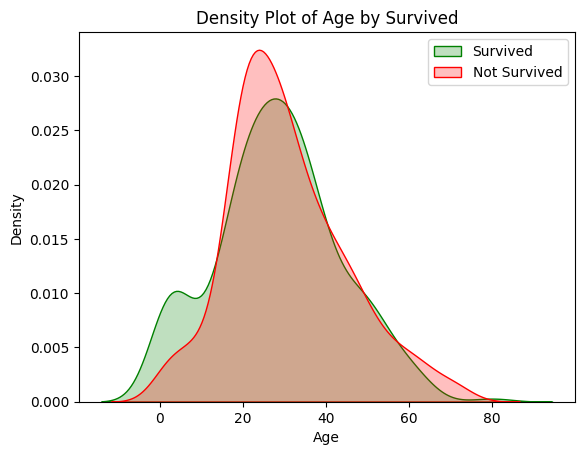

In [87]:
plot_distribution('Age','Survived')

In [88]:
title_age_median_train = train_data.groupby('Title')['Age'].median()
title_age_median_test = test_data.groupby('Title')['Age'].median()

In [89]:
train_data['Age'] = train_data.apply(
    lambda row: title_age_median_train[row['Title']] if pd.isnull(row['Age']) else row['Age'], axis=1
)

test_data['Age'] = test_data.apply(
    lambda row: title_age_median_test[row['Title']] if pd.isnull(row['Age']) else row['Age'], axis=1
)


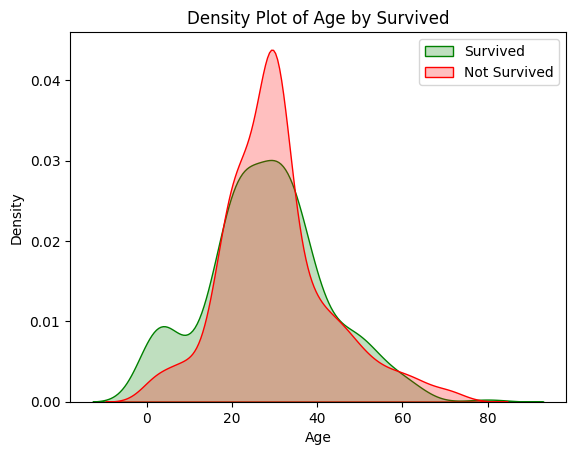

In [90]:
plot_distribution('Age','Survived')

In [139]:
train_data = pd.get_dummies(train_data, columns=['Title'], prefix='Title')
test_data = pd.get_dummies(test_data, columns=['Title'], prefix='Title')

In [140]:
print(train_data.columns)
print(test_data.columns)

Index(['PassengerId', 'Survived', 'Name', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Age_Category_16-20', 'Age_Category_20-30',
       'Age_Category_30-40', 'Age_Category_40-60', 'Age_Category_60-100',
       'Fare_bin_10-50', 'Fare_bin_50-100', 'Fare_bin_100-200',
       'Fare_bin_200+', 'Cabin_ind', 'Sex_male', 'Embarked_Q', 'Embarked_S',
       'Deck_B', 'Deck_C', 'Deck_D', 'Deck_E', 'Deck_F', 'Deck_G', 'Deck_M',
       'Deck_T', 'Pclass_2', 'Pclass_3', 'Ticket_Survival_Rate',
       'Familysize_Group_Small', 'Familysize_Group_Medium',
       'Familysize_Group_Large', 'Is_Mother', 'Title_Miss', 'Title_Mr',
       'Title_Mrs', 'Title_Rare'],
      dtype='object')
Index(['PassengerId', 'Name', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare',
       'Age_Category_16-20', 'Age_Category_20-30', 'Age_Category_30-40',
       'Age_Category_40-60', 'Age_Category_60-100', 'Fare_bin_10-50',
       'Fare_bin_50-100', 'Fare_bin_100-200', 'Fare_bin_200+', 'Cabin_ind',
       'Sex_male', 'Embark

In [141]:
train_data.drop('Name', axis=1, inplace=True)
test_data.drop('Name', axis=1, inplace=True)

In [91]:
bins_age = [0, 16,20,30,40,60,100] 
labels_age = ['0-16','16-20','20-30','30-40', '40-60','60-100']
train_data['Age_Category'] = pd.cut(train_data['Age'], bins=bins_age, labels=labels_age, right=True)
test_data['Age_Category'] = pd.cut(test_data['Age'], bins=bins_age, labels=labels_age, right=True)

In [92]:
age_survival_rate = train_data.groupby('Age_Category')['Survived'].mean()

print(age_survival_rate)


Age_Category
0-16      0.542857
16-20     0.341772
20-30     0.311688
30-40     0.482558
40-60     0.390625
60-100    0.227273
Name: Survived, dtype: float64


In [93]:
train_data = pd.get_dummies(train_data, columns=['Age_Category'], drop_first=True)
test_data = pd.get_dummies(test_data, columns=['Age_Category'], drop_first=True)

In [94]:
test_data['Fare'].fillna(test_data['Fare'].mean(), inplace=True)

In [95]:
test_data['Fare'].dtype

dtype('float64')

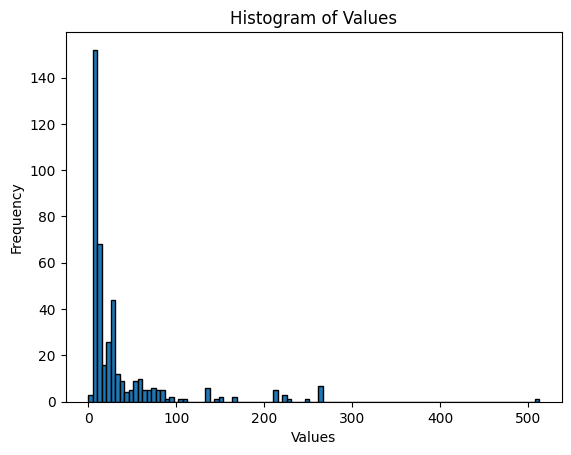

In [96]:
test_data['Fare'].plot(kind='hist', bins=100, edgecolor='black')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Histogram of Values')
plt.show()

In [97]:
bins_fare = [0, 10,50, 100, 200,600]
labels_fare = ['0-10','10-50', '50-100','100-200','200+']

train_data['Fare_bin'] = pd.cut(train_data['Fare'], bins=bins_fare, labels=labels_fare, right=False)
test_data['Fare_bin'] = pd.cut(train_data['Fare'], bins=bins_fare, labels=labels_fare, right=False)


Fare_bin
0-10       0.199405
10-50      0.421320
50-100     0.648148
100-200    0.757576
200+       0.700000
Name: Survived, dtype: float64


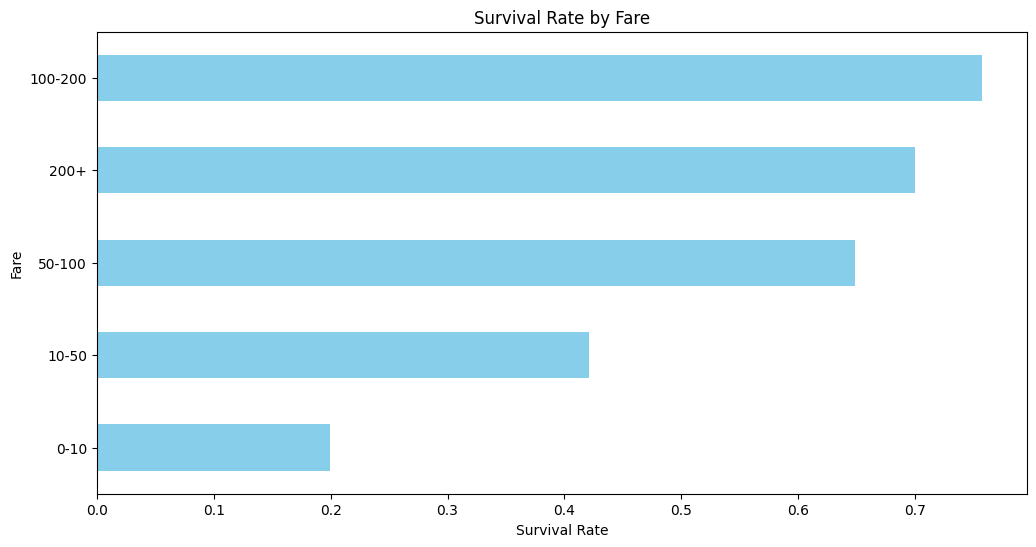

In [98]:
fare_survival_rate = train_data.groupby('Fare_bin')['Survived'].mean()

print(fare_survival_rate)

plt.figure(figsize=(12, 6))
fare_survival_rate.sort_values().plot(kind='barh', color='skyblue')
plt.title('Survival Rate by Fare')
plt.xlabel('Survival Rate')
plt.ylabel('Fare')
plt.show()

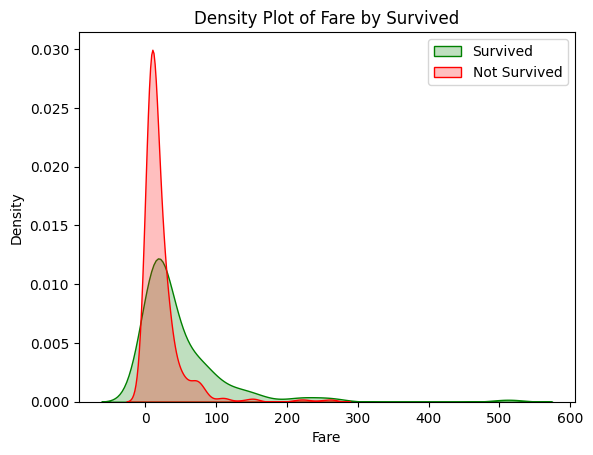

In [99]:
plot_distribution('Fare','Survived')

In [100]:
train_data = pd.get_dummies(train_data, columns=['Fare_bin'], drop_first=True)
test_data = pd.get_dummies(test_data, columns=['Fare_bin'], drop_first=True)

In [101]:
print(test_data.info())
print(train_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   PassengerId          418 non-null    int64  
 1   Pclass               418 non-null    int64  
 2   Name                 418 non-null    object 
 3   Sex                  418 non-null    object 
 4   Age                  418 non-null    float64
 5   SibSp                418 non-null    int64  
 6   Parch                418 non-null    int64  
 7   Ticket               418 non-null    object 
 8   Fare                 418 non-null    float64
 9   Cabin                91 non-null     object 
 10  Embarked             418 non-null    object 
 11  Title                418 non-null    object 
 12  Age_Category_16-20   418 non-null    uint8  
 13  Age_Category_20-30   418 non-null    uint8  
 14  Age_Category_30-40   418 non-null    uint8  
 15  Age_Category_40-60   418 non-null    uin

In [102]:
train_data['Cabin_ind'] = train_data['Cabin'].apply(lambda x: 0 if pd.isna(x) else 1)
test_data['Cabin_ind'] = test_data['Cabin'].apply(lambda x: 0 if pd.isna(x) else 1)

In [103]:
train_data['Deck'] = train_data['Cabin'].apply(lambda x: str(x)[0] if pd.notna(x) else 'M')  # 'M' for Missing
test_data['Deck'] = test_data['Cabin'].apply(lambda x: str(x)[0] if pd.notna(x) else 'M')

In [104]:
train_data.drop('Cabin', axis=1, inplace=True)
test_data.drop('Cabin', axis=1, inplace=True)
print(test_data.info())
print(train_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   PassengerId          418 non-null    int64  
 1   Pclass               418 non-null    int64  
 2   Name                 418 non-null    object 
 3   Sex                  418 non-null    object 
 4   Age                  418 non-null    float64
 5   SibSp                418 non-null    int64  
 6   Parch                418 non-null    int64  
 7   Ticket               418 non-null    object 
 8   Fare                 418 non-null    float64
 9   Embarked             418 non-null    object 
 10  Title                418 non-null    object 
 11  Age_Category_16-20   418 non-null    uint8  
 12  Age_Category_20-30   418 non-null    uint8  
 13  Age_Category_30-40   418 non-null    uint8  
 14  Age_Category_40-60   418 non-null    uint8  
 15  Age_Category_60-100  418 non-null    uin

In [105]:
train_data = pd.get_dummies(train_data, columns=['Sex', 'Embarked', 'Deck'], drop_first=True, 
                            prefix={'Sex': 'Sex', 'Embarked': 'Embarked', 'Deck': 'Deck'})
test_data = pd.get_dummies(test_data, columns=['Sex', 'Embarked', 'Deck'], drop_first=True, 
                           prefix={'Sex': 'Sex', 'Embarked': 'Embarked', 'Deck': 'Deck'})

In [106]:
train_data = pd.get_dummies(train_data, columns=['Pclass'], drop_first=True)

In [107]:
test_data = pd.get_dummies(test_data, columns=['Pclass'], drop_first=True)

In [142]:
train_data.drop('Ticket', axis=1, inplace=True)
test_data.drop('Ticket', axis=1, inplace=True)

In [143]:
print(test_data.info())
print(train_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 36 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   PassengerId              418 non-null    int64  
 1   Age                      418 non-null    float64
 2   SibSp                    418 non-null    int64  
 3   Parch                    418 non-null    int64  
 4   Fare                     418 non-null    float64
 5   Age_Category_16-20       418 non-null    uint8  
 6   Age_Category_20-30       418 non-null    uint8  
 7   Age_Category_30-40       418 non-null    uint8  
 8   Age_Category_40-60       418 non-null    uint8  
 9   Age_Category_60-100      418 non-null    uint8  
 10  Fare_bin_10-50           418 non-null    uint8  
 11  Fare_bin_50-100          418 non-null    uint8  
 12  Fare_bin_100-200         418 non-null    uint8  
 13  Fare_bin_200+            418 non-null    uint8  
 14  Cabin_ind                4

## Family and connection

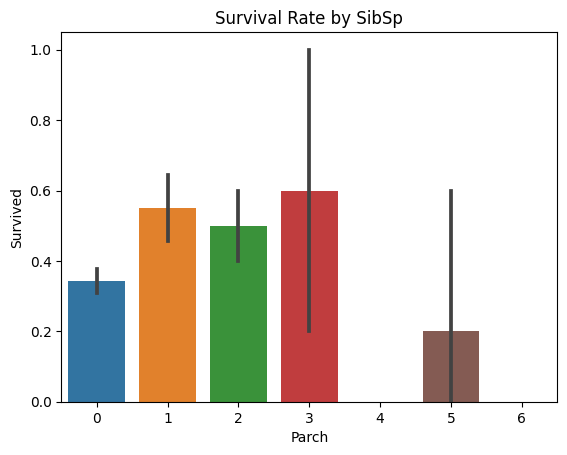

In [109]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot survival rate by SibSp
sns.barplot(x='Parch', y='Survived', data=train_data)
plt.title('Survival Rate by SibSp')
plt.show()

In [110]:
train_data['Family_size'] = train_data['SibSp'] + train_data['Parch'] 
test_data['Family_size'] = test_data['SibSp'] + test_data['Parch']

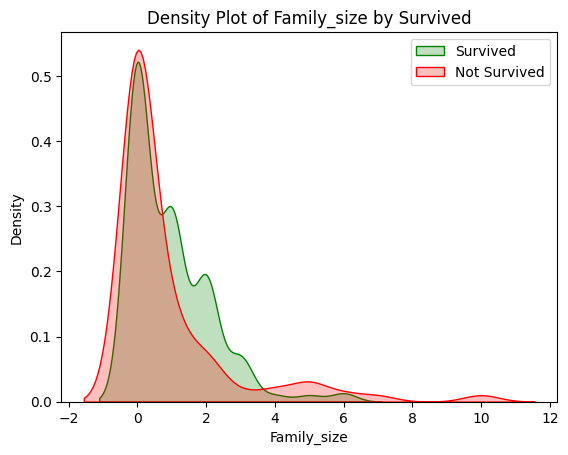

In [111]:
plot_distribution('Family_size','Survived')

In [112]:
bins_Familysize = [0,1,3,5,15]
labels_Familysize = ['solo', 'Small','Medium','Large']

train_data['Familysize_Group'] = pd.cut(train_data['Family_size'], bins=bins_Familysize, labels=labels_Familysize , right=False)
test_data['Familysize_Group'] = pd.cut(train_data['Family_size'], bins=bins_Familysize, labels=labels_Familysize , right=False)


In [113]:
train_data['Ticket'].describe()

count        891
unique       681
top       347082
freq           7
Name: Ticket, dtype: object

In [121]:
combined_data = pd.concat([train_data, test_data], axis=0, ignore_index=True)

combined_data['Is_Duplicate_Ticket'] = combined_data.duplicated(subset=['Ticket'], keep=False)

survival_rate_by_ticket = train_data.groupby('Ticket')['Survived'].mean()

combined_data['Ticket_Survival_Rate'] = combined_data['Ticket'].map(survival_rate_by_ticket)
    

In [124]:
combined_data.head()

,PassengerId,Survived,Name,Age,SibSp,Parch,Ticket,Fare,Title,Age_Category_16-20,...,Deck_F,Deck_G,Deck_M,Deck_T,Pclass_2,Pclass_3,Family_size,Familysize_Group,Ticket_Survival_Rate,Is_Duplicate_Ticket
0,1,0.0,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,Mr,0,...,0,0,1,0.0,0,1,1,Small,0.0,False
1,2,1.0,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,Mrs,0,...,0,0,0,0.0,0,0,1,Small,1.0,True
2,3,1.0,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,Miss,0,...,0,0,1,0.0,0,1,0,solo,1.0,False
3,4,1.0,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,Mrs,0,...,0,0,0,0.0,0,0,1,Small,0.5,True
4,5,0.0,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,Mr,0,...,0,0,1,0.0,0,1,0,solo,0.0,False


In [125]:
train_data['Ticket_Survival_Rate'] = combined_data['Ticket_Survival_Rate'].iloc[:len(train_data)]
test_data['Ticket_Survival_Rate'] = combined_data['Ticket_Survival_Rate'].iloc[len(train_data):].reset_index(drop=True)


In [130]:
train_data = pd.get_dummies(train_data, columns=['Familysize_Group'], drop_first=True)

In [131]:
test_data = pd.get_dummies(test_data, columns=['Familysize_Group'], drop_first=True)

In [136]:
def is_mother(row):
    return row['Title'] == 'Mrs' and row['Parch'] > 0

# Apply the function to create the 'Is_Mother' column
train_data['Is_Mother'] = train_data.apply(is_mother, axis=1).astype(int)
test_data['Is_Mother'] = test_data.apply(is_mother, axis=1).astype(int)


In [137]:
train_data.drop('Family_size', axis=1, inplace=True)
test_data.drop('Family_size', axis=1, inplace=True)

KeyError: "['Family_size'] not found in axis"

In [138]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 35 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   PassengerId              418 non-null    int64  
 1   Name                     418 non-null    object 
 2   Age                      418 non-null    float64
 3   SibSp                    418 non-null    int64  
 4   Parch                    418 non-null    int64  
 5   Ticket                   418 non-null    object 
 6   Fare                     418 non-null    float64
 7   Title                    418 non-null    object 
 8   Age_Category_16-20       418 non-null    uint8  
 9   Age_Category_20-30       418 non-null    uint8  
 10  Age_Category_30-40       418 non-null    uint8  
 11  Age_Category_40-60       418 non-null    uint8  
 12  Age_Category_60-100      418 non-null    uint8  
 13  Fare_bin_10-50           418 non-null    uint8  
 14  Fare_bin_50-100          4

In [51]:
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform both the training and test data
train_data[['Fare', 'Age']] = scaler.fit_transform(train_data[['Fare', 'Age']])
test_data[['Fare', 'Age']] = scaler.transform(test_data[['Fare', 'Age']])

In [144]:
X_train = train_data.drop(['Survived', 'PassengerId'], axis=1)
X_test = test_data.drop(['PassengerId'], axis=1)

In [145]:
X_train = train_data.drop(['Survived', 'PassengerId'], axis=1)

In [146]:
y_train = train_data['Survived']

In [147]:
X_test = test_data.drop(['PassengerId'], axis=1)

In [148]:
train_columns = set(X_train.columns)
test_columns = set(X_test.columns)

In [149]:
missing_cols_test = train_columns - test_columns

In [150]:
missing_cols_test

{'Deck_T'}

In [151]:
for col in missing_cols_test:
    X_test[col] = 0

In [152]:
X_test = X_test[X_train.columns]

In [153]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 36 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      418 non-null    float64
 1   SibSp                    418 non-null    int64  
 2   Parch                    418 non-null    int64  
 3   Fare                     418 non-null    float64
 4   Age_Category_16-20       418 non-null    uint8  
 5   Age_Category_20-30       418 non-null    uint8  
 6   Age_Category_30-40       418 non-null    uint8  
 7   Age_Category_40-60       418 non-null    uint8  
 8   Age_Category_60-100      418 non-null    uint8  
 9   Fare_bin_10-50           418 non-null    uint8  
 10  Fare_bin_50-100          418 non-null    uint8  
 11  Fare_bin_100-200         418 non-null    uint8  
 12  Fare_bin_200+            418 non-null    uint8  
 13  Cabin_ind                418 non-null    int64  
 14  Sex_male                 4

In [154]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 36 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      891 non-null    float64
 1   SibSp                    891 non-null    int64  
 2   Parch                    891 non-null    int64  
 3   Fare                     891 non-null    float64
 4   Age_Category_16-20       891 non-null    uint8  
 5   Age_Category_20-30       891 non-null    uint8  
 6   Age_Category_30-40       891 non-null    uint8  
 7   Age_Category_40-60       891 non-null    uint8  
 8   Age_Category_60-100      891 non-null    uint8  
 9   Fare_bin_10-50           891 non-null    uint8  
 10  Fare_bin_50-100          891 non-null    uint8  
 11  Fare_bin_100-200         891 non-null    uint8  
 12  Fare_bin_200+            891 non-null    uint8  
 13  Cabin_ind                891 non-null    int64  
 14  Sex_male                 8

## Construct Decision Trees

In [155]:
import xgboost as xgb
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [156]:
X_train.columns

Index(['Age', 'SibSp', 'Parch', 'Fare', 'Age_Category_16-20',
       'Age_Category_20-30', 'Age_Category_30-40', 'Age_Category_40-60',
       'Age_Category_60-100', 'Fare_bin_10-50', 'Fare_bin_50-100',
       'Fare_bin_100-200', 'Fare_bin_200+', 'Cabin_ind', 'Sex_male',
       'Embarked_Q', 'Embarked_S', 'Deck_B', 'Deck_C', 'Deck_D', 'Deck_E',
       'Deck_F', 'Deck_G', 'Deck_M', 'Deck_T', 'Pclass_2', 'Pclass_3',
       'Ticket_Survival_Rate', 'Familysize_Group_Small',
       'Familysize_Group_Medium', 'Familysize_Group_Large', 'Is_Mother',
       'Title_Miss', 'Title_Mr', 'Title_Mrs', 'Title_Rare'],
      dtype='object')

In [157]:
X_train_split, X_val, y_train_split, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)


In [158]:
print(X_train_split.isnull().sum().sum())  # Should be 0
print(y_train_split.isnull().sum())         # Should be 0

# Ensure correct types
print(type(X_train_split))  # Should be DataFrame or ndarray
print(type(y_train_split))  # Should be Series or ndarray

# Check dimensions
print(X_train_split.shape)  # Should be (n_samples, n_features)
print(y_train_split.shape) 


0
0
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>
(712, 36)
(712,)


In [160]:
param_grid = {
    'n_estimators': [25, 50, 75, 100, 150],
    'max_depth': [5, 6, 7, 8, 9, 10],
    'learning_rate': [0.003,0.01, 0.03, 0.1],
    'subsample': [0.7, 0.8, 0.9, 1.0],
    'colsample_bytree': [0.7,0.8, 0.9, 1.0],
    'reg_lambda':[0.001,0.003,0.01,0.03,0.1,1,0],
    'gamma':[0.1,0.3,0],
    'min_child_weight':[1,3,5]
}


In [178]:
print(y_train_split.value_counts())

0    444
1    268
Name: Survived, dtype: int64


In [179]:
from sklearn.metrics import make_scorer, f1_score
from sklearn.model_selection import StratifiedKFold, GridSearchCV
stratified_kf = StratifiedKFold(n_splits=5)

kf_random_search = RandomizedSearchCV(
    estimator=xgb.XGBClassifier(random_state=102),
    param_distributions=param_grid,
    n_iter=500,
    cv=stratified_kf,
    n_jobs=-1,
    scoring='accuracy',
    verbose=2,
    random_state=102,
    error_score='raise'
)

kf_random_search .fit(X_train_split, y_train_split)

Fitting 5 folds for each of 500 candidates, totalling 2500 fits


KeyboardInterrupt: 

In [69]:

results = kf_random_search.cv_results_

results_df = pd.DataFrame({
    'mean_test_score': results['mean_test_score'],
    'std_test_score': results['std_test_score'],
    'params': results['params'],
    'rank_test_score': results['rank_test_score']
})

print("Best parameters:", kF_grid_search.best_params_)
print(results_df.sort_values(by='rank_test_score'))

NameError: name 'kf_random_search' is not defined

In [70]:

results_df['params'][85]

NameError: name 'results_df' is not defined

In [71]:

grid_search = GridSearchCV(estimator=xgb.XGBClassifier(random_state=102), 
                           param_grid=param_grid, 
                           cv=3, 
                           n_jobs=-1, 
                           scoring='accuracy')

grid_search.fit(X_train_split, y_train_split)

print("Best parameters:", grid_search.best_params_)

results = grid_search.cv_results_

results_df = pd.DataFrame({
    'mean_test_score': results['mean_test_score'],
    'std_test_score': results['std_test_score'],
    'params': results['params'],
    'rank_test_score': results['rank_test_score']
})

print(results_df.sort_values(by='rank_test_score'))

KeyboardInterrupt: 

In [161]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, randint

randomized_search = RandomizedSearchCV(
    estimator=xgb.XGBClassifier(random_state=44),
    param_distributions=param_grid,
    n_iter=2000,  # Number of parameter settings sampled
    cv=5,
    n_jobs=-1,
    scoring='accuracy',
    random_state=44
)

randomized_search.fit(X_train_split, y_train_split)

RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                           random_state=44, ...),
                   n_iter=2000, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.7, 0.8, 0.9,
                                                             1.0],
                                        'gamma': [0.1, 0.3, 0],
                                        'learning_rate': [0.003, 0.01, 0.03,
                                                          0.1],
                                        'max_depth': [5, 6, 7, 8, 9, 10],
                                        'min_child_weight': [1, 3, 5],
                                        'n_estimators': [25, 50, 75, 100, 150],
                                        'reg_lambda': [0.001, 0.003, 0.01, 0.03,
                                                       0.1, 1, 0],
                                        'subsample': [0.7, 0.8, 0.9, 1.0]},
                   random_state=44, scoring='accuracy')

In [162]:

results = randomized_search.cv_results_

results_df = pd.DataFrame({
    'mean_test_score': results['mean_test_score'],
    'std_test_score': results['std_test_score'],
    'params': results['params'],
    'rank_test_score': results['rank_test_score']
})

print(results_df.sort_values(by='rank_test_score'))

      mean_test_score  std_test_score  \
936          0.984546        0.008203   
1273         0.984546        0.008203   
1994         0.984546        0.008203   
786          0.984546        0.008203   
948          0.984546        0.008203   
...               ...             ...   
1738         0.623599        0.002758   
96           0.623599        0.002758   
1735         0.623599        0.002758   
1247         0.623599        0.002758   
1463         0.623599        0.002758   

                                                 params  rank_test_score  
936   {'subsample': 0.8, 'reg_lambda': 0.03, 'n_esti...                1  
1273  {'subsample': 0.9, 'reg_lambda': 0.003, 'n_est...                1  
1994  {'subsample': 0.8, 'reg_lambda': 0.1, 'n_estim...                1  
786   {'subsample': 0.9, 'reg_lambda': 0, 'n_estimat...                1  
948   {'subsample': 0.9, 'reg_lambda': 0.01, 'n_esti...                1  
...                                                 ...  

In [182]:
print("Best parameters:", randomized_search.best_params_)

Best parameters: {'subsample': 0.7, 'reg_lambda': 0.003, 'n_estimators': 150, 'min_child_weight': 5, 'max_depth': 5, 'learning_rate': 0.03, 'gamma': 0.1, 'colsample_bytree': 0.7}


In [198]:


# Sort by rank_test_score to get the top models
top_5_results = results_df.sort_values(by='rank_test_score').head(5)

# Initialize an empty list to store the top models
top_models = []

# Loop through the top 5 results and build models using those parameters
for idx, row in top_5_results.iterrows():
    params = row['params']
    model = xgb.XGBClassifier(**params)
    top_models.append(model)

In [199]:
final_model = top_models[1]

In [200]:
final_model.fit(X_train_split,y_train_split)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.7, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.1, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.03, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=5, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=150, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

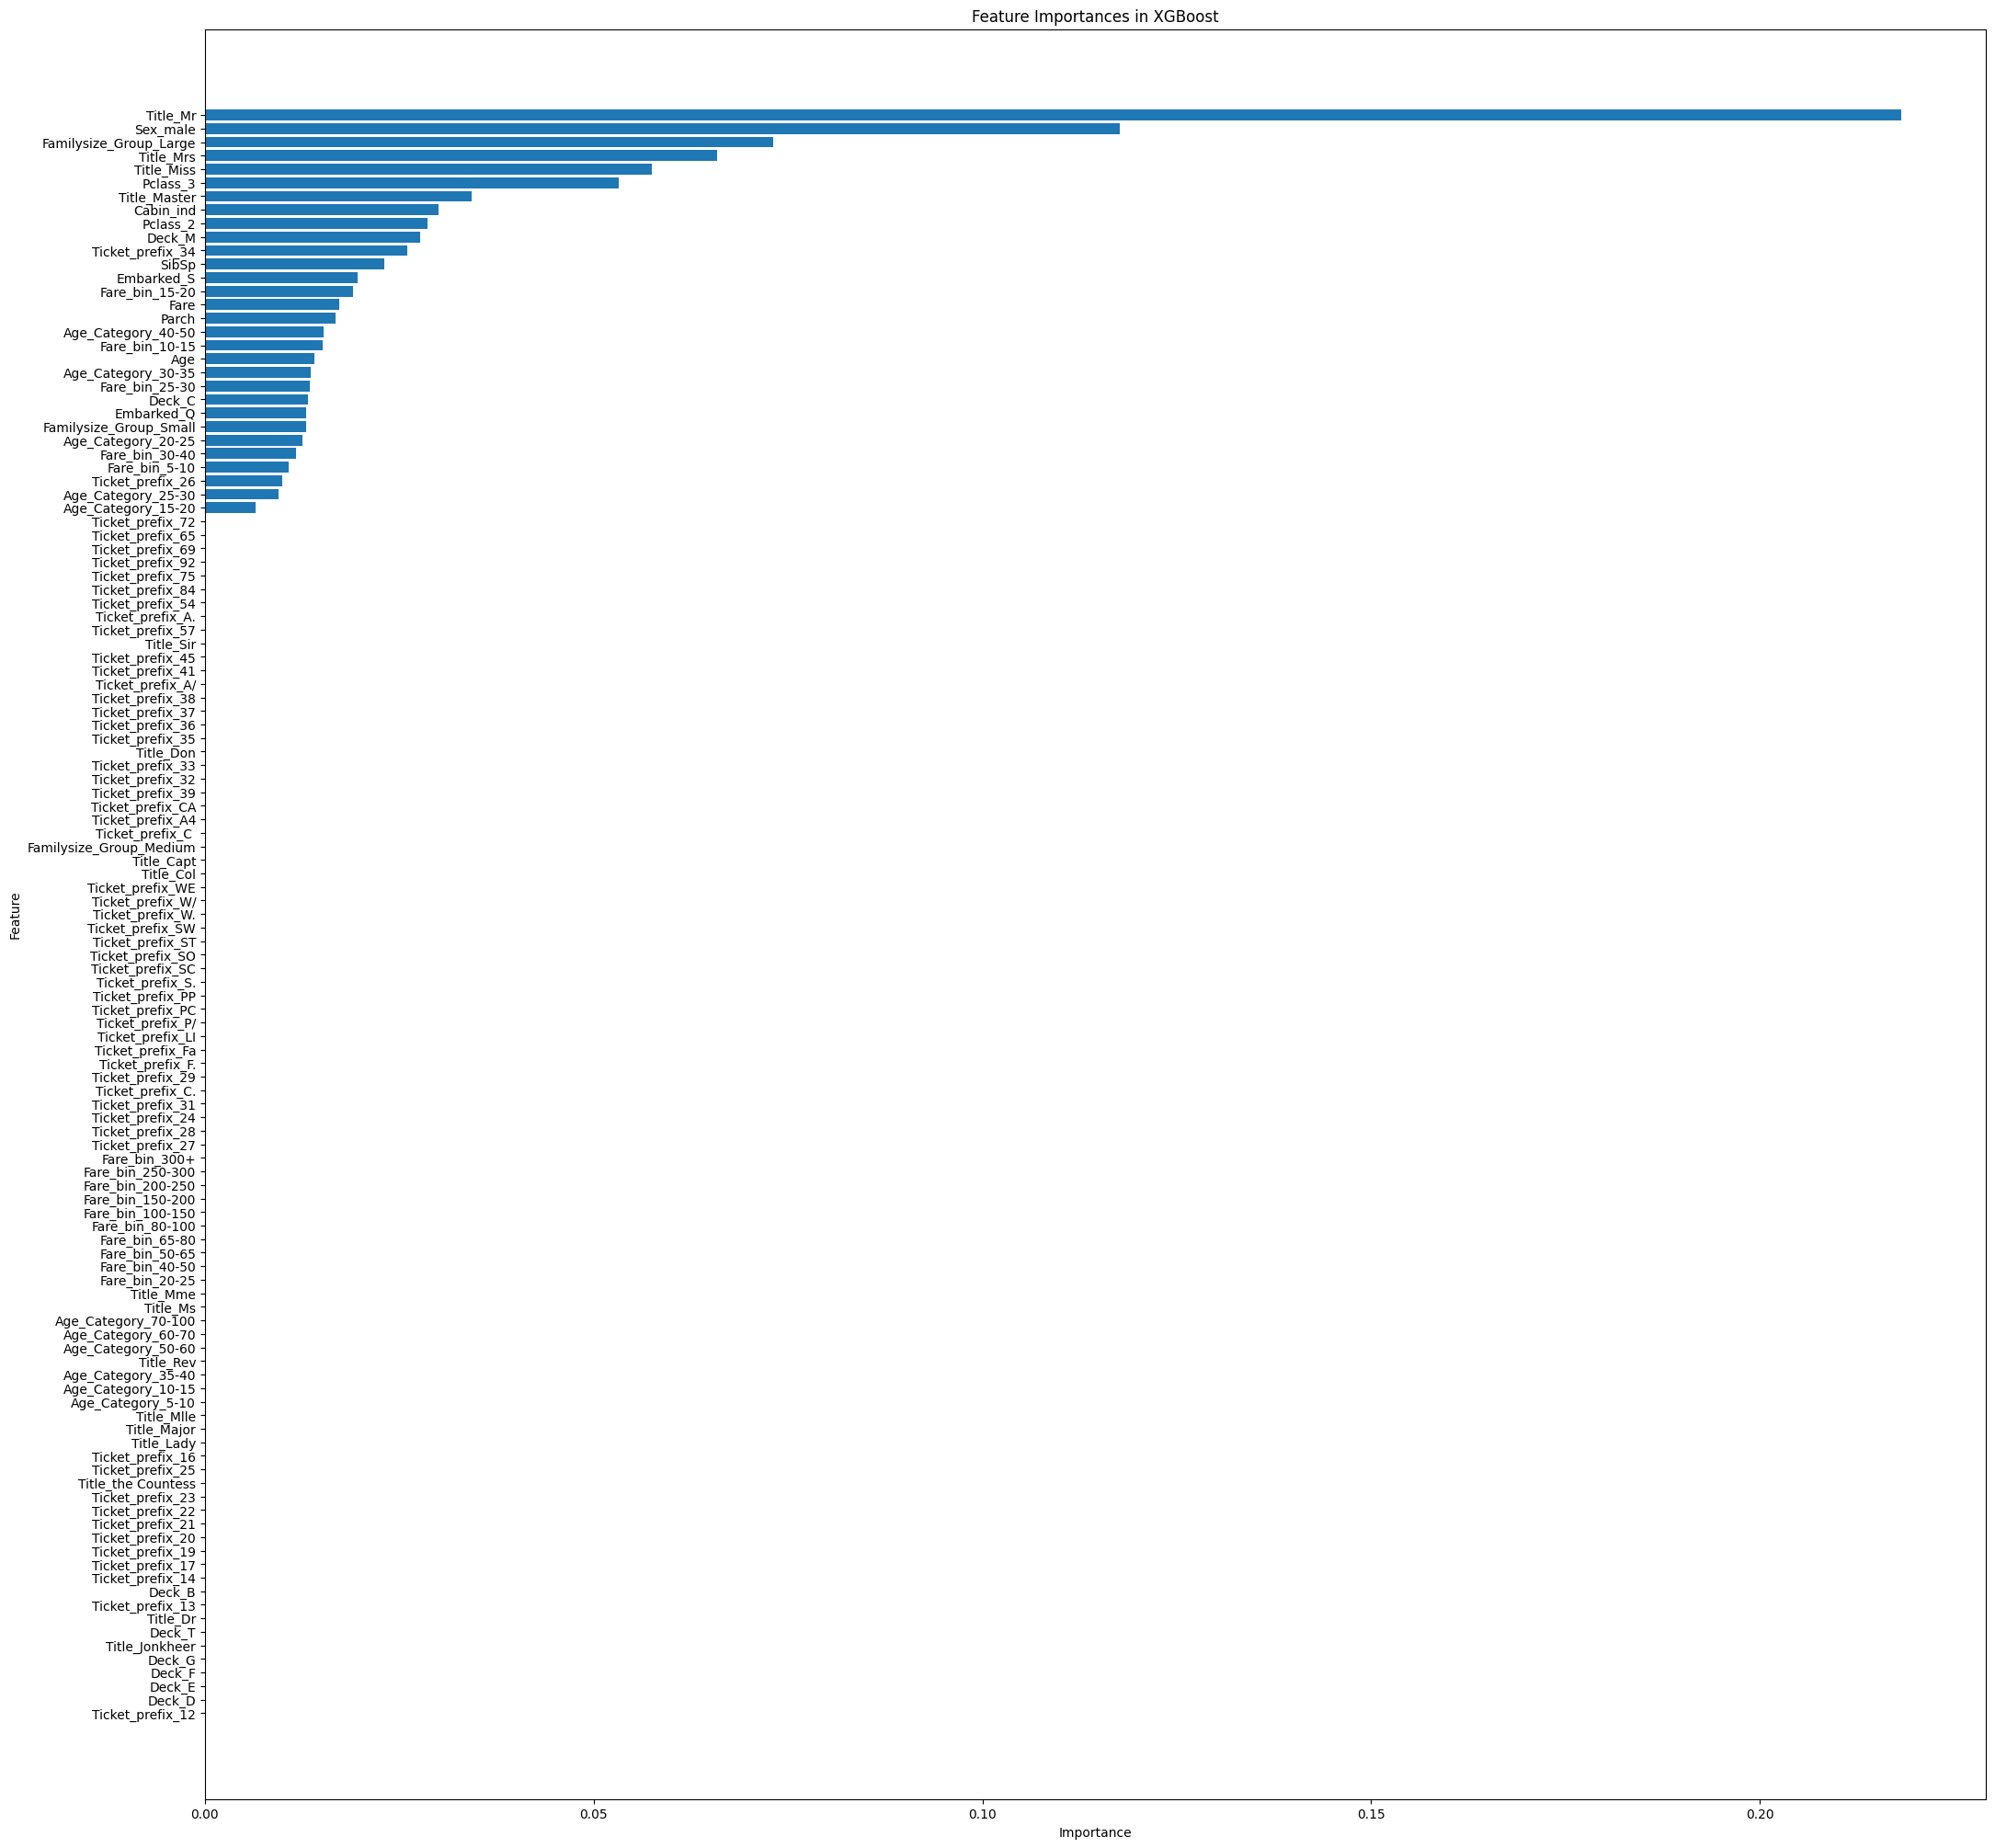

In [201]:
import matplotlib.pyplot as plt
feature_importances = final_model.feature_importances_

# Create a DataFrame for better visualization
features = X_train.columns
importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': feature_importances
})

# Sort the DataFrame by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(25, 25))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances in XGBoost')
plt.gca().invert_yaxis()
plt.show()

In [202]:
final_model.fit(X_train_split,y_train_split)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.7, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.1, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.03, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=5, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=150, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [203]:
y_pred = final_model.predict(X_val)

In [204]:
accuracy = accuracy_score(y_val, y_pred)

In [207]:
for i in range(5):
    cv_scores = cross_val_score(top_models[i], X_train, y_train, cv=5, scoring='accuracy')

    # Print cross-validation scores
    print("Cross-validation Scores:")
    print(cv_scores)
    print(i)
    # Print mean and standard deviation of the cross-validation scores
    print(f"Mean Accuracy: {cv_scores.mean():.4f}")
    print(f"Standard Deviation: {cv_scores.std():.4f}")

Cross-validation Scores:
[0.83240223 0.82022472 0.86516854 0.80898876 0.85955056]
0
Mean Accuracy: 0.8373
Standard Deviation: 0.0219
Cross-validation Scores:
[0.83240223 0.8258427  0.86516854 0.80337079 0.83707865]
1
Mean Accuracy: 0.8328
Standard Deviation: 0.0199
Cross-validation Scores:
[0.83240223 0.8258427  0.87640449 0.80898876 0.87640449]
2
Mean Accuracy: 0.8440
Standard Deviation: 0.0275
Cross-validation Scores:
[0.84357542 0.8258427  0.89325843 0.8258427  0.83707865]
3
Mean Accuracy: 0.8451
Standard Deviation: 0.0250
Cross-validation Scores:
[0.83798883 0.8258427  0.87078652 0.82022472 0.86516854]
4
Mean Accuracy: 0.8440
Standard Deviation: 0.0205


In [208]:
final_model=top_models[3]

In [209]:
final_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=1.0, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.1, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=9, max_leaves=None,
              min_child_weight=5, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=150, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [210]:
print(X_train.dtypes)
print(X_test.dtypes)

Age                        float64
SibSp                        int64
Parch                        int64
Fare                       float64
Title_Capt                   uint8
                            ...   
Pclass_2                     uint8
Pclass_3                     uint8
Familysize_Group_Small       uint8
Familysize_Group_Medium      uint8
Familysize_Group_Large       uint8
Length: 119, dtype: object
Age                        float64
SibSp                        int64
Parch                        int64
Fare                       float64
Title_Capt                   int64
                            ...   
Pclass_2                     uint8
Pclass_3                     uint8
Familysize_Group_Small       uint8
Familysize_Group_Medium      uint8
Familysize_Group_Large       uint8
Length: 119, dtype: object


In [211]:
predictions = final_model.predict(X_test)

In [212]:
 results = pd.DataFrame({
     'PassengerId': test_data['PassengerId'],
     'Survived': predictions
    })

In [213]:
output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': predictions})
output.to_csv('prediction22.csv', index=False)

In [165]:
results_df.sort_values(by='rank_test_score').head(5)

,mean_test_score,std_test_score,params,rank_test_score
854,0.844095,0.016913,"{'subsample': 0.8, 'reg_lambda': 0.1, 'n_estim...",1
1868,0.842697,0.027202,"{'subsample': 0.8, 'reg_lambda': 0.001, 'n_est...",2
157,0.842697,0.027202,"{'subsample': 0.8, 'reg_lambda': 0.003, 'n_est...",2
1888,0.842687,0.014585,"{'subsample': 0.9, 'reg_lambda': 0.03, 'n_esti...",4
1654,0.842677,0.023820,"{'subsample': 0.9, 'reg_lambda': 0, 'n_estimat...",5


In [166]:
top_5_params =results_df.sort_values(by='rank_test_score').head(5)['params'].tolist()

In [167]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier

base_models = [
    (f'xgb_model_{i}', XGBClassifier(**params, random_state=102))
    for i, params in enumerate(top_5_params)
]

In [168]:
meta_model = LogisticRegression()

In [169]:
from sklearn.ensemble import StackingClassifier

stacking_model = StackingClassifier(estimators=base_models, final_estimator=meta_model, cv=5)

stacking_model.fit(X_train_split, y_train_split)

accuracy = stacking_model.score(X_val, y_val)

In [170]:
accuracy

0.8324022346368715

In [171]:
stacking_model.fit(X_train, y_train)

StackingClassifier(cv=5,
                   estimators=[('xgb_model_0',
                                XGBClassifier(base_score=None, booster=None,
                                              callbacks=None,
                                              colsample_bylevel=None,
                                              colsample_bynode=None,
                                              colsample_bytree=1.0, device=None,
                                              early_stopping_rounds=None,
                                              enable_categorical=False,
                                              eval_metric=None,
                                              feature_types=None, gamma=0.3,
                                              grow_policy=None,
                                              importance_type=None,
                                              interaction_constraints=Non...
                                              importance_type=None,
                                              interaction_constraints=None,
                                              learning_rate=0.1, max_bin=None,
                                              max_cat_threshold=None,
                                              max_cat_to_onehot=None,
                                              max_delta_step=None, max_depth=5,
                                              max_leaves=None,
                                              min_child_weight=None,
                                              missing=nan,
                                              monotone_constraints=None,
                                              multi_strategy=None,
                                              n_estimators=25, n_jobs=None,
                                              num_parallel_tree=None,
                                              random_state=102, ...))],
                   final_estimator=LogisticRegression())

In [172]:
predictions = stacking_model.predict(X_test)

In [173]:
 results = pd.DataFrame({
     'PassengerId': test_data['PassengerId'],
     'Survived': predictions
    })

In [174]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Columns: 119 entries, Age to Familysize_Group_Large
dtypes: float64(2), int64(3), uint8(114)
memory usage: 134.1 KB


In [175]:
output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': predictions})
output.to_csv('prediction2.csv', index=False)

In [171]:
from sklearn.ensemble import RandomForestClassifier

param_grid = {
    'n_estimators': [30, 40, 50, 75, 100, 200],
    'max_depth': [5, 6, 7, 8, 9, 10, 12, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None, 0.5, 0.7],
    'bootstrap': [True, False]
}

rf_model = RandomForestClassifier(random_state=102)

grid_search = GridSearchCV(estimator=rf_model, 
                           param_grid=param_grid, 
                           cv=5, 
                           n_jobs=-1, 
                           scoring='accuracy')

grid_search.fit(X_train_split, y_train_split)

print("Best parameters:", grid_search.best_params_)

RF_results = grid_search.cv_results_

results_df = pd.DataFrame({
    'mean_test_score': RF_results['mean_test_score'],
    'std_test_score': RF_results['std_test_score'],
    'params': RF_results['params'],
    'rank_test_score': RF_results['rank_test_score']
})

print(results_df.sort_values(by='rank_test_score'))

KeyboardInterrupt: 

In [98]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state=42)
rfe = RFE(model, n_features_to_select=40)
fit = rfe.fit(X_train, y_train)

selected_features = X_train.columns[fit.support_]
print("Selected features:", selected_features)

Selected features: Index(['Age', 'SibSp', 'Parch', 'Fare', 'Title_Master', 'Title_Miss',
       'Title_Mr', 'Title_Mrs', 'Age_Category_12-20', 'Age_Category_20-30',
       'Age_Category_30-40', 'Age_Category_40-50', 'Fare_bin_10-20',
       'Fare_bin_20-30', 'Fare_bin_30-40', 'Fare_bin_50-100', 'Cabin_ind',
       'Sex_male', 'Embarked_Q', 'Embarked_S', 'Deck_B', 'Deck_C', 'Deck_D',
       'Deck_E', 'Deck_M', 'Ticket_prefix_16', 'Ticket_prefix_19',
       'Ticket_prefix_24', 'Ticket_prefix_26', 'Ticket_prefix_31',
       'Ticket_prefix_34', 'Ticket_prefix_35', 'Ticket_prefix_36',
       'Ticket_prefix_38', 'Ticket_prefix_A/', 'Ticket_prefix_PC',
       'Ticket_prefix_ST', 'Pclass_2', 'Pclass_3', 'Alone'],
      dtype='object')


In [99]:
importances = model.feature_importances_
feature_names = X_train.columns
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

print(importance_df)

NotFittedError: This RandomForestClassifier instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [100]:
final_model = RandomForestClassifier(
    bootstrap=False,
    max_depth=9,
    min_samples_leaf=2,
    min_samples_split=5,
    n_estimators=40,
    max_features='sqrt',
    random_state=102
)


In [101]:
final_model.fit(X_train_split, y_train_split)

RandomForestClassifier(bootstrap=False, max_depth=9, min_samples_leaf=2,
                       min_samples_split=5, n_estimators=40, random_state=102)

In [102]:
y_pred = final_model.predict(X_val)

In [103]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print("Accuracy on validation set:", accuracy_score(y_val, y_pred))
print("Classification Report:\n", classification_report(y_val, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_val, y_pred))

Accuracy on validation set: 0.8435754189944135
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.89      0.87       105
           1       0.83      0.78      0.81        74

    accuracy                           0.84       179
   macro avg       0.84      0.83      0.84       179
weighted avg       0.84      0.84      0.84       179

Confusion Matrix:
 [[93 12]
 [16 58]]


In [104]:
final_model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=False, max_depth=9, min_samples_leaf=2,
                       min_samples_split=5, n_estimators=40, random_state=102)

In [105]:
predictions = final_model.predict(X_test)

In [107]:
 results = pd.DataFrame({
     'PassengerId': test_data['PassengerId'],
     'Survived': predictions
    })
output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': predictions})
output.to_csv('prediction7.csv', index=False)

,PassengerId,Survived
count,418.000000,418.000000
mean,1100.500000,0.327751
std,120.810458,0.469956
min,892.000000,0.000000
25%,996.250000,0.000000
50%,1100.500000,0.000000
75%,1204.750000,1.000000
max,1309.000000,1.000000


,PassengerId,Survived
count,418.000000,418.000000
mean,1100.500000,0.322967
std,120.810458,0.468170
min,892.000000,0.000000
25%,996.250000,0.000000
50%,1100.500000,0.000000
75%,1204.750000,1.000000
max,1309.000000,1.000000
